Dataset URL

In [1]:
url1="https://raw.githubusercontent.com/apalbright/Friends/master/raw_data/friendsdata.csv"
url2="https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-09-08/friends.csv"
url3="https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-09-08/friends_emotions.csv"
url4="https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-09-08/friends_info.csv"

Import Libraries

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
emotions=pd.read_csv("C:/Users/conne/Python Scripts/Dataset/friends_emotions.csv")
info=pd.read_csv("C:/Users/conne/Python Scripts/Dataset/friends_info.csv")
dynamics=pd.read_csv("C:/Users/conne/Python Scripts/Dataset/friendsdata.csv")
dialogues=pd.read_csv("C:/Users/conne/Python Scripts/Dataset/dialogues.csv")

# Exploring the frequency of characters individually and as pair

In [4]:
print(dynamics.head(2))



   epseason  epnum                                epname  dynamics
0         1      1  The One Where Monica Gets a Roommate         3
1         1      1  The One Where Monica Gets a Roommate         5


In [5]:
names=['Chandler','Joey','Monica','Phoebe','Rachel','Ross']

chandler=1
joey=2
monica=3
phoebe=4
rachel=5
ross=6

In [6]:
individual_plotline_codes = [chandler, joey, monica, phoebe, rachel, ross]
def find_ind_freq(l):
        
    ind_freq = []
    
    for i in l:
        ind_freq.append(dynamics[dynamics['dynamics'] == i].count()[0])
    
    ind_freq_dict = dict(zip(names, ind_freq))
  
    return names, ind_freq, ind_freq_dict


names, ind_freq, ind_freq_dict =  find_ind_freq(individual_plotline_codes)
print(ind_freq_dict)

{'Chandler': 34, 'Joey': 54, 'Monica': 42, 'Phoebe': 65, 'Rachel': 47, 'Ross': 56}


In [7]:
colors=['#BC312A', '#FFDC00' , '#42A2D6']

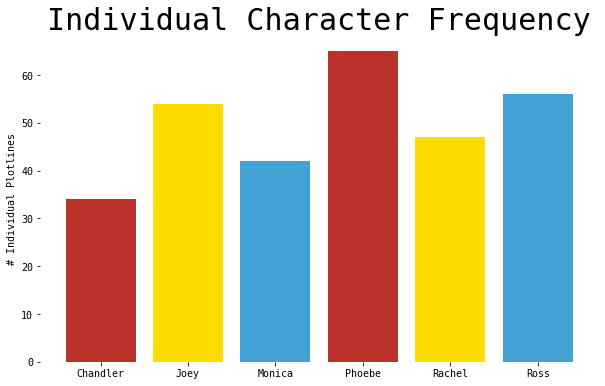

In [10]:
labels=names
x_values=np.arange(len(labels))
y_values=find_ind_freq(individual_plotline_codes)[1]

fig,ax=plt.subplots(figsize=(10,6))
plt.grid(False)
plt.box(False)
plt.rcParams["font.family"] = "monospace"
plt.bar(x_values, y_values, align='center', alpha=1,color=colors)
plt.xticks(x_values, labels)
plt.ylabel('# Individual Plotlines')
plt.title('Individual Character Frequency',size=30)
plt.show()

Observation:
    Phoebe is the most appeared character on screen, with Chandler being the lowest.
    Although the whole series was mostly shot in Monica and Rachel's apartment, it is interesting to see Phoebe being the most appeared character.
    And obviously Chandler was left out in most of the group meetings😂😂

In [11]:
pair_codes = [12,13,14,15,16,23,24,25,26,34,35,36,45,46,56]
pair_names = ['chandler_joey', 'chandler_monica', 'chandler_phoebe','chandler_rachel', 'chandler_ross'
                           , 'joey_monica', 'joey_phoebe', 'joey_rachel', 'joey_ross'
                           , 'monica_phoebe', 'monica_rachel', 'monica_ross'
                           , 'phoebe_rachel', 'phoebe_ross'
                           , 'rachel_ross']

In [12]:
def find_ind_freq(l):
        
    pair_freq = []
    
    for i in l:
        pair_freq.append(dynamics[dynamics['dynamics'] == i].count()[0])
    
    pair_freq_dict = dict(zip(pair_names, pair_freq))
  
    return pair_names, pair_freq, pair_freq_dict


p_names, pair_freq, pair_freq_dict =  find_ind_freq(pair_codes)
print(pair_freq_dict)

{'chandler_joey': 36, 'chandler_monica': 63, 'chandler_phoebe': 6, 'chandler_rachel': 7, 'chandler_ross': 12, 'joey_monica': 7, 'joey_phoebe': 20, 'joey_rachel': 26, 'joey_ross': 14, 'monica_phoebe': 18, 'monica_rachel': 12, 'monica_ross': 4, 'phoebe_rachel': 17, 'phoebe_ross': 14, 'rachel_ross': 70}


In [13]:
pair_df=pd.DataFrame(pair_freq_dict,index=pair_freq_dict.keys())
pair_df=pair_df.iloc[0]
pair_df=pair_df.reset_index()
pair_df.columns=['pair','frequency']
pair_df=pair_df.sort_values('frequency',ascending=False)

pair_df[:5]

,pair,frequency
14,rachel_ross,70
1,chandler_monica,63
0,chandler_joey,36
7,joey_rachel,26
6,joey_phoebe,20


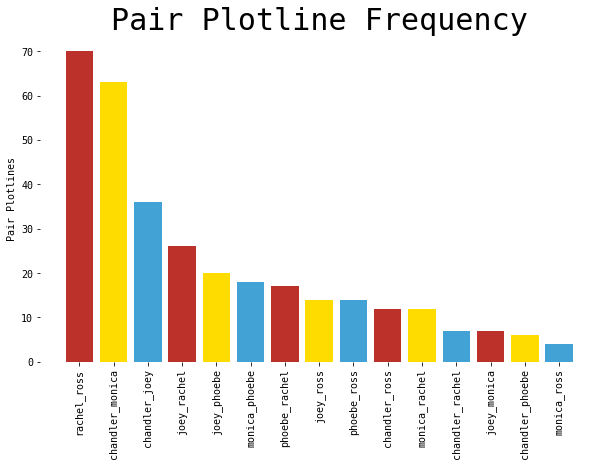

In [14]:
labels=pair_df.pair
y_pos=np.arange(len(labels))
y_value=pair_df.frequency

fig,ax=plt.subplots(figsize=(10,6))
plt.rcParams["font.family"] = "monospace"
plt.grid(False)
plt.box(False)

plt.bar(y_pos,y_value,alpha=1,color=colors,align='center')
plt.title("Pair Plotline Frequency",size=30)
plt.ylabel("Pair Plotlines")
plt.xticks(y_pos,labels,rotation=90)
plt.show()

Observation:
    The pair frequency happens to be the show's couples- Rachel&Ross, Monica&Chandler, also Chandler&Joey.
    Even in this data, Monica and Rachel were roomates for like an era, yet they have appered comparitivly less on screen together.

# Exploring the Ratings, Views, Directors, Writers of the episodes

In [15]:
info.rename(columns={'episode':'epnum','season':'epseason'},inplace=True)
cols = ['epnum','epseason']

new_df=dynamics.join(info.set_index(cols), on=cols)

In [16]:
new_df.head(5)

,epseason,epnum,epname,dynamics,title,directed_by,written_by,air_date,us_views_millions,imdb_rating
0,1,1,The One Where Monica Gets a Roommate,3,The Pilot,James Burrows,David Crane & Marta Kauffman,1994-09-22,21.5,8.3
1,1,1,The One Where Monica Gets a Roommate,5,The Pilot,James Burrows,David Crane & Marta Kauffman,1994-09-22,21.5,8.3
2,1,1,The One Where Monica Gets a Roommate,56,The Pilot,James Burrows,David Crane & Marta Kauffman,1994-09-22,21.5,8.3
3,1,1,The One Where Monica Gets a Roommate,126,The Pilot,James Burrows,David Crane & Marta Kauffman,1994-09-22,21.5,8.3
4,1,2,The One with the Sonogram at the End,3,The One with the Sonogram at the End,James Burrows,David Crane & Marta Kauffman,1994-09-29,20.2,8.1


In [17]:
new_df.shape

(696, 10)

In [18]:
def get_pair_ratings(l):
    
    ratings_list=[]
    for i in l:
        ratings_list.append(new_df[new_df['dynamics']==i].imdb_rating.mean())
        
    pair_ratings_dict=dict(zip(pair_names,ratings_list))
    
    return pair_names,ratings_list,pair_ratings_dict

print(get_pair_ratings(pair_codes)[2])

{'chandler_joey': 8.549999999999997, 'chandler_monica': 8.601587301587301, 'chandler_phoebe': 8.566666666666668, 'chandler_rachel': 8.728571428571428, 'chandler_ross': 8.391666666666666, 'joey_monica': 8.5, 'joey_phoebe': 8.459999999999999, 'joey_rachel': 8.434615384615386, 'joey_ross': 8.5, 'monica_phoebe': 8.316666666666668, 'monica_rachel': 8.525, 'monica_ross': 8.425, 'phoebe_rachel': 8.529411764705882, 'phoebe_ross': 8.464285714285714, 'rachel_ross': 8.557142857142859}


In [20]:
pair_rating_dict=get_pair_ratings(pair_codes)[2]

pair_rating_df=pd.DataFrame(pair_rating_dict,index=pair_rating_dict.keys())
pair_rating_df=pair_rating_df.iloc[0]
pair_rating_df=pair_rating_df.reset_index()
pair_rating_df.rename(columns={'index':'pair','chandler_joey':'ratings'},inplace=True)

pair_rating_df[:5]



,pair,ratings
0,chandler_joey,8.550000
1,chandler_monica,8.601587
2,chandler_phoebe,8.566667
3,chandler_rachel,8.728571
4,chandler_ross,8.391667


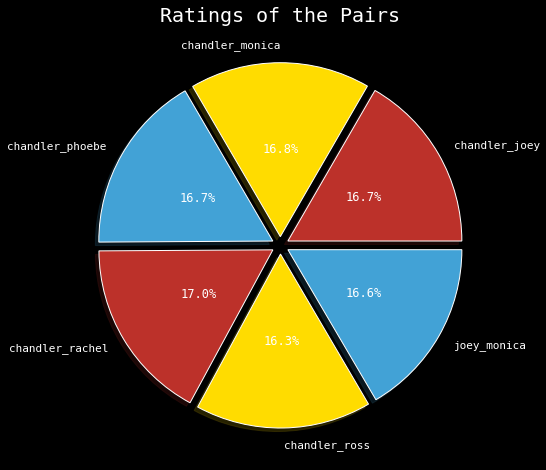

In [164]:
pie, ax = plt.subplots(figsize=[12,8])
labels = pair_rating_df[:6].pair
plt.rcParams["font.family"]="monospace"
#plt.box(True)
#plt.grid(True)
#plt.style.use('dark_background')
plt.pie(x=pair_rating_df[:6].ratings, autopct="%.1f%%", explode=[0.05]*6, labels=labels, pctdistance=0.5,shadow=True,colors=colors)
plt.title("Ratings of the Pairs", fontsize=20);
#pie.savefig("DeliveryPieChart.png")

Observation:
    Although Rachel&Ross had most on screen appearence, the other two couples have the highest rated duo.

In [22]:
frequency_rating_df=pd.merge(pair_df,pair_rating_df)
frequency_rating_df.sort_values('ratings',ascending=False,inplace=True)

frequency_rating_df[:5]

,pair,frequency,ratings
11,chandler_rachel,7,8.728571
1,chandler_monica,63,8.601587
13,chandler_phoebe,6,8.566667
0,rachel_ross,70,8.557143
2,chandler_joey,36,8.550000


Text(0.5, 1.0, 'Pair Frequency vs Ratings')

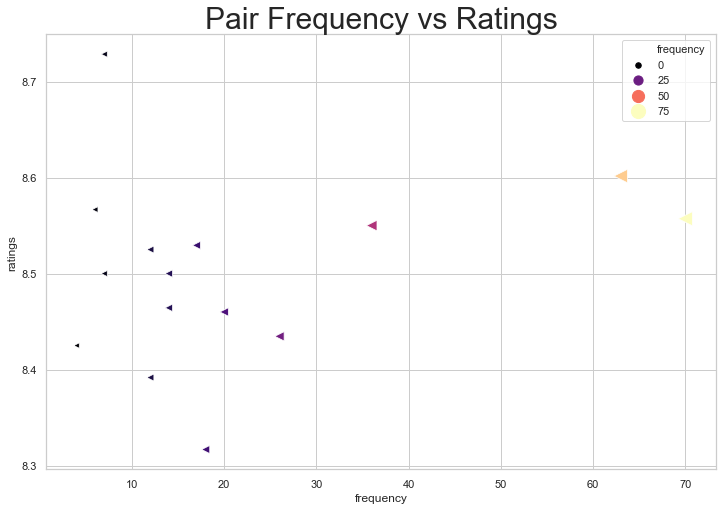

In [102]:
fig = plt.gcf()
fig.set_size_inches(12,8)
sns.set(style="whitegrid")
sns.scatterplot(x="frequency", y="ratings", 
                data=frequency_rating_df,
                hue="frequency",
                marker="<",
                palette='magma',
                size='frequency',
                sizes=(30,200),
                s= 5).set_title("Pair Frequency vs Ratings",size=30)

Observation:
    There looks like no correlation between the frequency of occurence and the ratings.
    Although Chandler appeared the least on screen individually, he seems to have made the appearence as a duo with all the characters a lot.
    Finally Chandler&Monica seem to be high rated duo than Ross&Rachel.
    Astonishingly Chandler and Rachel happen to be the highest rated duo, maybe because of the cheesecake they smuggled together🤣
    

In [81]:
info.head(2)

,epseason,epnum,title,directed_by,written_by,air_date,us_views_millions,imdb_rating
0,1,1,The Pilot,James Burrows,David Crane & Marta Kauffman,1994-09-22,21.5,8.3
1,1,2,The One with the Sonogram at the End,James Burrows,David Crane & Marta Kauffman,1994-09-29,20.2,8.1


In [82]:
info['directed_by'].value_counts()[0:8]

Gary Halvorson     54
Kevin S. Bright    53
Michael Lembeck    24
James Burrows      15
Gail Mancuso       14
Peter Bonerz       12
Ben Weiss          10
David Schwimmer    10
Name: directed_by, dtype: int64

In [83]:
directors_list=list(info['directed_by'].value_counts()[0:8].index)
directors_list

['Gary Halvorson',
 'Kevin S. Bright',
 'Michael Lembeck',
 'James Burrows',
 'Gail Mancuso',
 'Peter Bonerz',
 'Ben Weiss',
 'David Schwimmer']

In [84]:
def get_director_rating(l):
    
    dir_list=[]
    for i in l:
        dir_list.append(info[info['directed_by']==i].imdb_rating.mean())
    
    dir_rating_dict=dict(zip(directors_list,dir_list))
    
    return directors_list,dir_list,dir_rating_dict

print(get_director_rating(directors_list)[2])

{'Gary Halvorson': 8.401851851851852, 'Kevin S. Bright': 8.656603773584903, 'Michael Lembeck': 8.52083333333333, 'James Burrows': 8.506666666666666, 'Gail Mancuso': 8.357142857142858, 'Peter Bonerz': 8.325000000000001, 'Ben Weiss': 8.3, 'David Schwimmer': 8.55}


In [85]:
dir_rating_dict=get_director_rating(directors_list)[2]

dir_rating_df=pd.DataFrame(dir_rating_dict,index=dir_rating_dict.keys())
dir_rating_df=dir_rating_df.iloc[0]
dir_rating_df=dir_rating_df.reset_index()
dir_rating_df.rename(columns={'index':'Director','Gary Halvorson':'Ratings'},inplace=True)
dir_rating_df.sort_values('Ratings',ascending=False,inplace=True)

dir_rating_df[:5]

,Director,Ratings
1,Kevin S. Bright,8.656604
7,David Schwimmer,8.550000
2,Michael Lembeck,8.520833
3,James Burrows,8.506667
0,Gary Halvorson,8.401852


Observation:
    The top 5 directors of the show in order of their ratings as shown above. All of the ratings are almost close to each other.
    It is interesting that David Schimmer is exceptional both as Director and Ross(character he plays), when compared to the number of episodes he has directed (10 episodes)

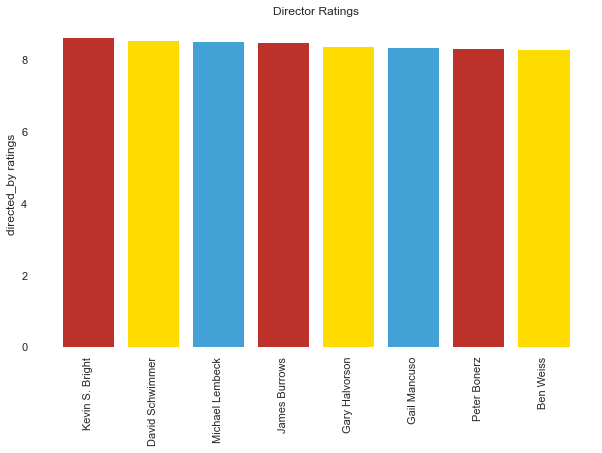

In [86]:
labels=dir_rating_df.Director

y_pos=np.arange(len(labels))
y_values=dir_rating_df.Ratings

fig,ax=plt.subplots(figsize=(10,6))
plt.rcParams["font.family"]="monospace"
plt.box(False)
plt.grid(False)

plt.bar(y_pos,y_values,alpha=1,color=colors,align='center')
plt.title("Director Ratings")
plt.ylabel("directed_by ratings")
plt.xticks(y_pos,labels,rotation=90)
plt.show()


In [93]:
s_ratings = pd.DataFrame(info.groupby('epseason')['imdb_rating'].mean())
s_ratings.reset_index(inplace=True)
s_ratings

,epseason,imdb_rating
0,1,8.316667
1,2,8.458333
2,3,8.408000
3,4,8.475000
4,5,8.637500
5,6,8.496000
6,7,8.437500
7,8,8.450000
8,9,8.304167
9,10,8.688889


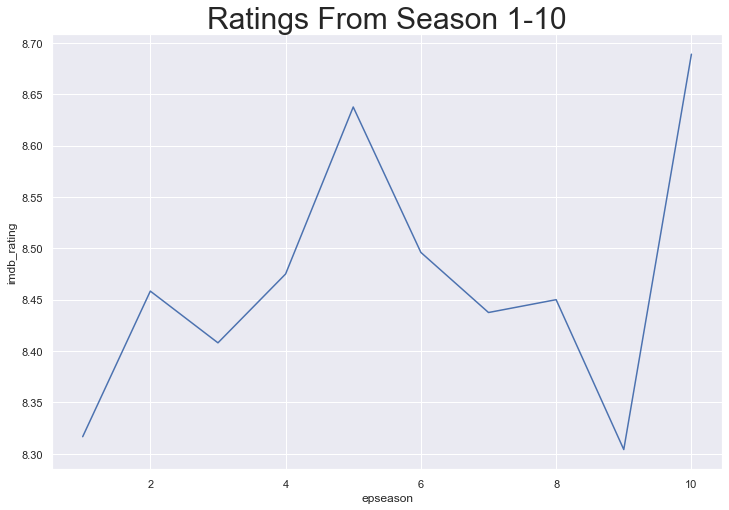

In [101]:
fig = plt.gcf()
fig.set_size_inches(12,8)
sns.set(style="darkgrid")
sns.lineplot(x="epseason", y="imdb_rating", data=s_ratings).set_title("Ratings From Season 1-10",size=30)
plt.show()

In [103]:
views_dict=dict(info.groupby('epseason')['us_views_millions'].sum())
views_df=pd.DataFrame(views_dict,index=views_dict.keys())
views_df=views_df.iloc[0]
views_df=views_df.reset_index()
views_df.rename(columns={'index':'Season',1:'Views'},inplace=True)

views_df

,Season,Views
0,1,595.00
1,2,761.30
2,3,657.70
3,4,598.80
4,5,593.90
5,6,565.40
6,7,529.23
7,8,641.29
8,9,574.33
9,10,470.33


Text(0.5, 1.0, 'Views across the 10 Seasons')

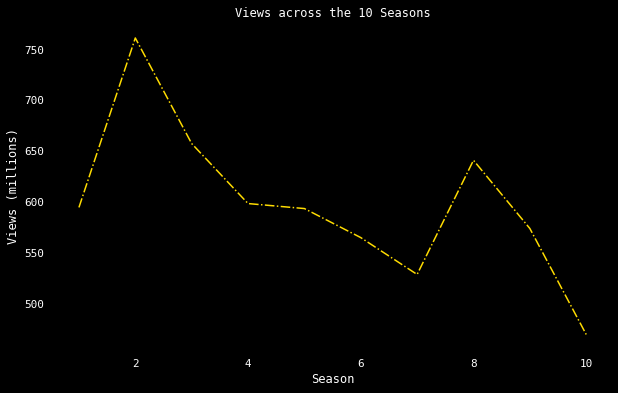

In [105]:
x_values=views_df.Season
y_values=views_df.Views
fig,ax=plt.subplots(figsize=(10,6))
plt.rcParams["font.family"]="monospace"
plt.box(False)
plt.grid(False)
plt.style.use('dark_background')
plt.plot(x_values,y_values,'-.',color='#FFDC00')
plt.xlabel("Season")
plt.ylabel("Views (millions)")
plt.title('Views across the 10 Seasons')

In [106]:
Episode_rating=info[['epseason','epnum','title','imdb_rating']]
Episode_rating_top=Episode_rating.sort_values(['imdb_rating','epseason','epnum'],ascending=False)
Episode_rating_top=Episode_rating_top.drop_duplicates(subset=['epseason','epnum'])
Episode_rating_top

Episode_rating_top['title'][0:5]

235                         The Last One
234                         The Last One
110    The One Where Everybody Finds Out
84              The One with the Embryos
37           The One with the Prom Video
Name: title, dtype: object

In [114]:
episode_rating_df=Episode_rating[['epseason','epnum','imdb_rating']]
episode_rating_df=episode_rating_df.drop_duplicates(subset=['epseason','epnum'],keep='first')
episode_rating_df
ratings_pt=pd.pivot_table(episode_rating_df,values='imdb_rating',index=['epnum'],columns='epseason')
ratings_pt



epseason,1,2,3,4,5,6,7,8,9,10
epnum,,,,,,,,,,
1,8.3,8.5,8.4,9.1,8.9,8.7,8.4,8.7,8.6,8.5
2,8.1,8.2,9.0,8.1,9.0,8.2,8.3,9.1,8.6,8.8
3,8.2,8.4,8.1,8.5,8.8,8.2,8.1,8.7,8.2,8.8
4,8.1,8.0,8.1,8.2,8.3,8.5,8.1,9.3,8.2,8.3
5,8.5,8.3,8.1,8.4,8.8,8.2,8.1,8.1,8.5,8.2
6,8.1,8.6,9.1,8.5,8.1,8.5,8.9,8.5,8.4,8.2
7,9.0,9.0,8.3,8.7,8.4,8.4,8.5,7.9,8.7,8.3
8,8.1,8.5,8.4,9.1,9.2,8.5,8.2,8.8,8.8,8.9
9,8.2,8.0,9.0,7.9,9.1,9.2,8.1,9.3,8.2,8.6


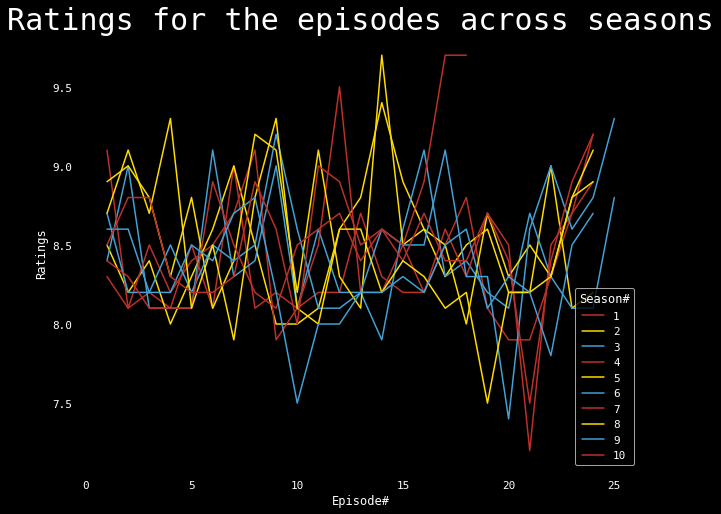

In [136]:

ratings_pt.plot(color=colors,figsize=(10,8))

plt.rcParams["font.family"]="monospace"
plt.box(False)
plt.grid(False)
plt.style.use('dark_background')
plt.xlabel("Episode#")
plt.gca()
plt.ylabel('Ratings')
plt.title("Ratings for the episodes across seasons",size=30)
plt.legend(title="Season#")

In [212]:
ratings_pt=pd.pivot_table(episode_rating_df,values='imdb_rating',index=['epseason'],aggfunc=[np.max, np.min])
ratings_pt

,amax,amin
,imdb_rating,imdb_rating
epseason,,
1,9.0,7.9
2,9.4,8.0
3,9.1,7.9
4,9.5,7.2
5,9.7,8.0
6,9.3,7.4
7,9.2,7.5
8,9.3,7.5


In [173]:
s_emotion = emotions.groupby(['season','episode','emotion'])
s_emotion = s_emotion.size().unstack().fillna(0)
s_emotion.head(20)

emotion         Joyful   Mad  Neutral  Peaceful  Powerful   Sad  Scared
season episode                                                         
1      1          15.0  17.0     34.0       8.0       4.0  14.0     9.0
       2          18.0  27.0     42.0       3.0      12.0   9.0    21.0
       3          17.0   8.0     60.0       7.0      12.0  10.0    13.0
       4          42.0  27.0     69.0       1.0       7.0   5.0     6.0
       5          34.0  20.0     63.0       6.0       2.0  11.0    20.0
       6           6.0   5.0     13.0       1.0       4.0   0.0     7.0
       7          33.0   9.0     23.0       5.0       5.0   3.0    18.0
       8          26.0  14.0     86.0       5.0       5.0   4.0    12.0
       9          18.0  10.0     46.0       2.0       6.0   4.0    11.0
       10         14.0   1.0     25.0       2.0       2.0   2.0     7.0
       11         14.0  18.0     21.0       2.0       4.0   7.0     6.0
       12         47.0  20.0     58.0       4.0       8.0  16.0    15.0
       13         19.0  22.0     51.0       4.0       4.0  11.0    19.0
       14         39.0  11.0     72.0       8.0       6.0   3.0    19.0
       15         25.0  13.0     34.0       2.0       6.0   2.0     9.0
       16         12.0  11.0     87.0       7.0       4.0  10.0    18.0
       17         25.0   8.0     75.0       7.0       5.0  12.0    39.0
       18         16.0   4.0     28.0       0.0       1.0   1.0     0.0
       19          7.0   1.0     29.0       0.0       1.0   2.0     3.0
       20         21.0  11.0     56.0       5.0       1.0   3.0    20.0

In [175]:
E = int(raw_input())
English = set(raw_input().split())

F = int(raw_input())
French = set(raw_input().split())

print(len(English & French))

NameError: name 'raw_input' is not defined